# Build and Explore Models

## Carga de librerías requeridas

In [87]:
#imports
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt 
import seaborn as sns 

#pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

#feature selection
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

#model metrics 
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation 
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Cargar datos
Los datasets fueron almacenados en pickles en el ejercicio anterior almacenado en el repositorio https://github.com/randallxram/XTOLC5T2

In [2]:
dsCredit01 = pd.read_pickle('dsCredit01.pickle')
dsCredit02 = pd.read_pickle('dsCredit02.pickle')
dsCredit01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
LIMIT_BAL          30000 non-null int64
SEX                30000 non-null category
EDUCATION          30000 non-null category
MARRIAGE           30000 non-null category
AGE                30000 non-null int64
PAY_0              30000 non-null category
PAY_2              30000 non-null category
PAY_3              30000 non-null category
PAY_4              30000 non-null category
PAY_5              30000 non-null category
PAY_6              30000 non-null category
BILL_AMT1          30000 non-null int64
BILL_AMT2          30000 non-null int64
BILL_AMT3          30000 non-null int64
BILL_AMT4          30000 non-null int64
BILL_AMT5          30000 non-null int64
BILL_AMT6          30000 non-null int64
PAY_AMT1           30000 non-null int64
PAY_AMT2           30000 non-null int64
PAY_AMT3           30000 non-null int64
PAY_AMT4           30000 non-null int64
PAY_AMT5           30000

## Más pre-processing
En el ejercicio anterior se procesó la mayoría de los datos, pero algunas features no fueron pre-procesadas para facilitar la presentación del EDA. Ahora, antes de crear los modelos y hace el feature selection, se debe proceder con el procesamiento pendiente.

### Estandarización de BILL_AMTN y PAY_AMTN


In [3]:
dsBillAmt_scaled = dsCredit01[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].copy()
dsBillAmt_scaled = pd.DataFrame(data=preprocessing.scale(dsBillAmt_scaled), columns=('BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'))
dsBillAmt_scaled.info()
dsBillAmt_scaled.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
BILL_AMT1    30000 non-null float64
BILL_AMT2    30000 non-null float64
BILL_AMT3    30000 non-null float64
BILL_AMT4    30000 non-null float64
BILL_AMT5    30000 non-null float64
BILL_AMT6    30000 non-null float64
PAY_AMT1     30000 non-null float64
PAY_AMT2     30000 non-null float64
PAY_AMT3     30000 non-null float64
PAY_AMT4     30000 non-null float64
PAY_AMT5     30000 non-null float64
PAY_AMT6     30000 non-null float64
dtypes: float64(12)
memory usage: 2.7 MB


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187
5,0.178947,0.110856,0.152777,-0.371029,-0.340357,-0.316487,-0.191003,-0.178215,-0.259486,-0.244230,-0.248683,-0.248381
6,4.301531,5.098086,5.739063,7.762727,7.281574,7.305617,2.978712,1.479085,1.861472,0.983852,0.585848,0.481207
7,-0.534359,-0.685644,-0.669262,-0.669062,-0.665674,-0.643203,-0.318999,-0.230905,-0.296801,-0.270976,-0.203716,-0.206642
8,-0.542385,-0.492930,-0.503332,-0.482684,-0.469082,-0.590276,-0.140952,-0.256990,-0.272265,-0.244230,-0.248683,-0.237130
9,-0.695642,-0.690983,-0.677929,-0.672497,-0.449114,-0.419118,-0.341942,-0.256990,-0.296801,0.522212,-0.240697,-0.293382


### Encoding categorical features
Es hora de devolver las features categóricas a valores integers (pero aún así categóricas). Facilidad!

In [4]:
encCategorical = OrdinalEncoder(dtype=np.int32)
dsCategorical = dsCredit01[['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','LIMIT_RANGE','AGE_RANGE']]
encCategorical.fit(dsCategorical)
encCategorical.categories_
dsCategorical = pd.DataFrame(data=encCategorical.transform(dsCategorical), columns=('SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','LIMIT_RANGE','AGE_RANGE')).astype(object)
dsCategorical = dsCategorical.astype("category")
dsCategorical.info()
dsCategorical.head(10)
#enc.inverse_transform([[1, 0], [0, 1]])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
SEX            30000 non-null category
EDUCATION      30000 non-null category
MARRIAGE       30000 non-null category
PAY_0          30000 non-null category
PAY_2          30000 non-null category
PAY_3          30000 non-null category
PAY_4          30000 non-null category
PAY_5          30000 non-null category
PAY_6          30000 non-null category
LIMIT_RANGE    30000 non-null category
AGE_RANGE      30000 non-null category
dtypes: category(11)
memory usage: 325.8 KB


,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,LIMIT_RANGE,AGE_RANGE
0,0,3,1,4,4,0,0,1,1,0,0
1,0,3,3,0,4,2,2,2,3,1,0
2,0,3,3,2,2,2,2,2,2,0,1
3,0,3,1,2,2,2,2,2,2,0,1
4,1,3,1,0,2,0,2,2,2,0,3
5,1,0,3,2,2,2,2,2,2,0,1
6,1,0,3,2,2,2,2,2,2,4,0
7,0,3,3,2,0,0,2,2,0,0,0
8,0,1,1,2,2,4,2,2,2,1,0
9,1,1,3,1,1,1,1,0,0,0,1


### Juntar en el dataset nuevo las features transformadas

In [5]:
dsReady = pd.concat([dsCategorical, dsBillAmt_scaled, dsCredit01[["DEFAULT_NUMERIC"]]], axis=1)
dsReady.info()
dsReady.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
SEX                30000 non-null category
EDUCATION          30000 non-null category
MARRIAGE           30000 non-null category
PAY_0              30000 non-null category
PAY_2              30000 non-null category
PAY_3              30000 non-null category
PAY_4              30000 non-null category
PAY_5              30000 non-null category
PAY_6              30000 non-null category
LIMIT_RANGE        30000 non-null category
AGE_RANGE          30000 non-null category
BILL_AMT1          30000 non-null float64
BILL_AMT2          30000 non-null float64
BILL_AMT3          30000 non-null float64
BILL_AMT4          30000 non-null float64
BILL_AMT5          30000 non-null float64
BILL_AMT6          30000 non-null float64
PAY_AMT1           30000 non-null float64
PAY_AMT2           30000 non-null float64
PAY_AMT3           30000 non-null float64
PAY_AMT4           30000 non-null float6

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,LIMIT_RANGE,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_NUMERIC
0,0,3,1,4,4,0,0,1,1,0,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,0,3,3,0,4,2,2,2,3,1,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,0,3,3,2,2,2,2,2,2,0,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,0,3,1,2,2,2,2,2,2,0,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,1,3,1,0,2,0,2,2,2,0,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0
5,1,0,3,2,2,2,2,2,2,0,...,-0.371029,-0.340357,-0.316487,-0.191003,-0.178215,-0.259486,-0.244230,-0.248683,-0.248381,0
6,1,0,3,2,2,2,2,2,2,4,...,7.762727,7.281574,7.305617,2.978712,1.479085,1.861472,0.983852,0.585848,0.481207,0
7,0,3,3,2,0,0,2,2,0,0,...,-0.669062,-0.665674,-0.643203,-0.318999,-0.230905,-0.296801,-0.270976,-0.203716,-0.206642,0
8,0,1,1,2,2,4,2,2,2,1,...,-0.482684,-0.469082,-0.590276,-0.140952,-0.256990,-0.272265,-0.244230,-0.248683,-0.237130,0
9,1,1,3,1,1,1,1,0,0,0,...,-0.672497,-0.449114,-0.419118,-0.341942,-0.256990,-0.296801,0.522212,-0.240697,-0.293382,0


### Covarianza

In [6]:
covMat = dsReady.cov()
print(covMat)

                 BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
BILL_AMT1         1.000033   0.951515   0.892308   0.860301   0.829806   
BILL_AMT2         0.951515   1.000033   0.928357   0.892512   0.859807   
BILL_AMT3         0.892308   0.928357   1.000033   0.924000   0.883939   
BILL_AMT4         0.860301   0.892512   0.924000   1.000033   0.940166   
BILL_AMT5         0.829806   0.859807   0.883939   0.940166   1.000033   
BILL_AMT6         0.802677   0.831621   0.853349   0.900971   0.946228   
PAY_AMT1          0.140282   0.280375   0.244343   0.233020   0.217038   
PAY_AMT2          0.099358   0.100854   0.316947   0.207571   0.181253   
PAY_AMT3          0.156892   0.150723   0.130016   0.300033   0.252313   
PAY_AMT4          0.158308   0.147403   0.143409   0.130196   0.293128   
PAY_AMT5          0.167031   0.157963   0.179718   0.160438   0.141579   
PAY_AMT6          0.179347   0.174262   0.182332   0.177643   0.164190   
DEFAULT_NUMERIC  -0.008154  -0.005891 

[Text(0, 0.5, 'BILL_AMT1'),
 Text(0, 1.5, 'BILL_AMT2'),
 Text(0, 2.5, 'BILL_AMT3'),
 Text(0, 3.5, 'BILL_AMT4'),
 Text(0, 4.5, 'BILL_AMT5'),
 Text(0, 5.5, 'BILL_AMT6'),
 Text(0, 6.5, 'PAY_AMT1'),
 Text(0, 7.5, 'PAY_AMT2'),
 Text(0, 8.5, 'PAY_AMT3'),
 Text(0, 9.5, 'PAY_AMT4'),
 Text(0, 10.5, 'PAY_AMT5'),
 Text(0, 11.5, 'PAY_AMT6'),
 Text(0, 12.5, 'DEFAULT_NUMERIC')]

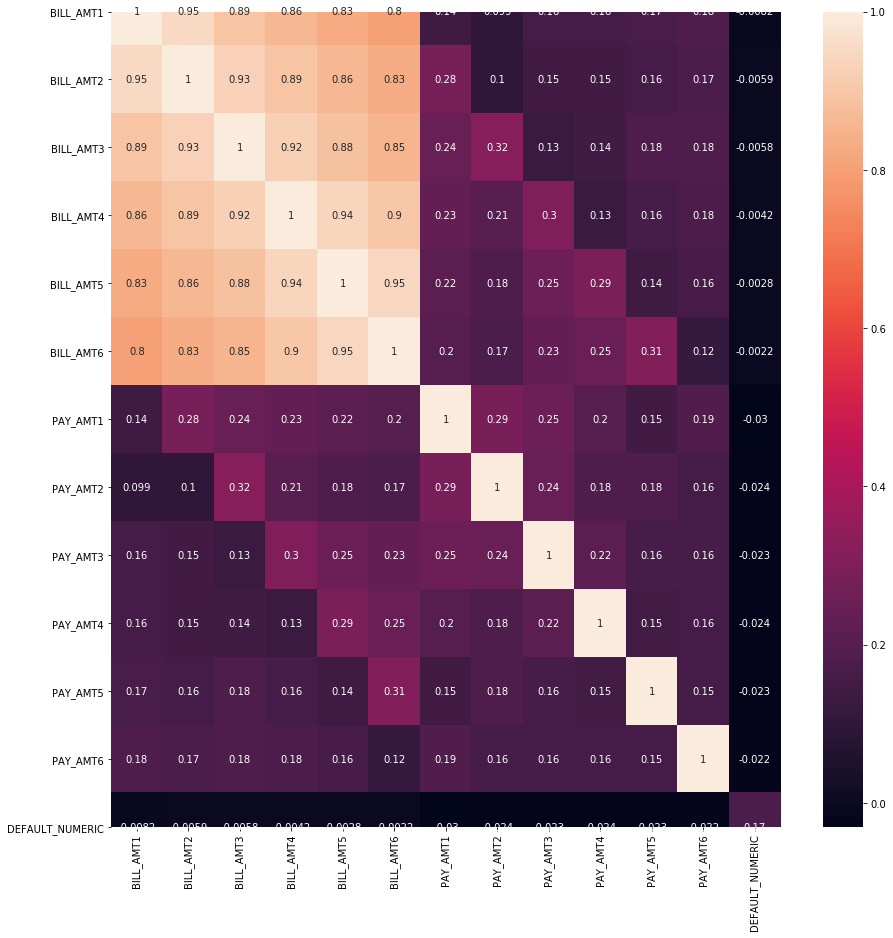

In [7]:
fig, ax = plt.subplots(figsize=(15,15))       
sns.heatmap(covMat, annot=True, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)

Existe una alta covarianza entre los saldos de las cuentas (BILL_AMTN) de meses contiguos. La covarianza se debilita cuando los meses no son contiguos pero aún sigue siendo alta por encima de 0.8. 

Si se utiliza la variable DEFAULT_PAYMENT como numérica prácticamente no hay covarianza con ninguna de las variables numéricas. Esto nos lleva a la conclusión que estas features no tienen ninguna relación con el default. 

No importa cuando pagues o cuanto sea tu saldo. Lo realmente importante es el estado del mes, o bien, obtener la relación entre el saldo y lo pagado (idea por desarrollar aunque no se puede asumir nada)

### Feature Selection with RFE
En este caso se utilizará RFE con Cross Validation

In [8]:
# Elimino variable dependiente agregar al set de datos para la covarianza
dsReady.drop(["DEFAULT_NUMERIC"], axis=1, inplace=True)

In [37]:
# tomo una muestra
X_train, X_test, y_train, y_test = train_test_split(dsReady, dsCredit01[["DEFAULT_PAYMENT"]], test_size=0.20, random_state=75)

# Crear objeto RFE y calcular puntaje del cross validation.
svc = SVC(kernel="linear")

# "Accuracy" is proportional a la cantidad de clasificaciones correctas
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(5), scoring='accuracy', n_jobs=2, min_features_to_select=5)


In [30]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 20689 to 15263
Data columns (total 1 columns):
DEFAULT_PAYMENT    6000 non-null category
dtypes: category(1)
memory usage: 52.8 KB


In [31]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 20689 to 15263
Data columns (total 23 columns):
SEX            6000 non-null category
EDUCATION      6000 non-null category
MARRIAGE       6000 non-null category
PAY_0          6000 non-null category
PAY_2          6000 non-null category
PAY_3          6000 non-null category
PAY_4          6000 non-null category
PAY_5          6000 non-null category
PAY_6          6000 non-null category
LIMIT_RANGE    6000 non-null category
AGE_RANGE      6000 non-null category
BILL_AMT1      6000 non-null float64
BILL_AMT2      6000 non-null float64
BILL_AMT3      6000 non-null float64
BILL_AMT4      6000 non-null float64
BILL_AMT5      6000 non-null float64
BILL_AMT6      6000 non-null float64
PAY_AMT1       6000 non-null float64
PAY_AMT2       6000 non-null float64
PAY_AMT3       6000 non-null float64
PAY_AMT4       6000 non-null float64
PAY_AMT5       6000 non-null float64
PAY_AMT6       6000 non-null float64
dtypes: category(11), floa

In [38]:
rfecv.fit(X_test,  y_test.values.ravel())

print("Optimal number of features : %d" % rfecv.n_features_)



Optimal number of features : 22


In [33]:
rfecv.support_

array([ True, False, False, False, False, False,  True,  True, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False])

In [34]:

dsReady.columns

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'LIMIT_RANGE', 'AGE_RANGE', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [35]:
rfecv.grid_scores_

array([0.77783349, 0.77783349, 0.77783349, 0.77783349, 0.77783349,
       0.77783349, 0.77783349, 0.77783349, 0.77783349, 0.77783349,
       0.77783349, 0.77783349, 0.77783349, 0.77783349, 0.77783349,
       0.77783349, 0.77783349, 0.77783349, 0.77783349])

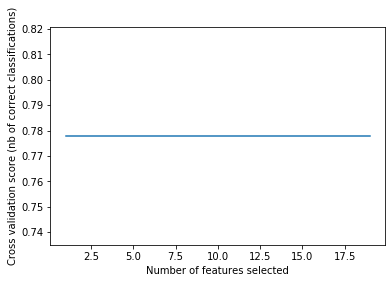

In [36]:

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### Conclusión con Feature Selection
El proceso de feature selection fue "frustrante". No hubo consistencia en la cantidad de features a utilizar y generalmente todo se centraba en elergir PAY_4, la cuál, en el EDA, no tuvo un peso importante. 

Por tanto, se decide utilizar TODAS las features en los modelos. Si por utilizar todas las features los modelos se vuelven ineficientes se reconsiderará volver al paso del feature selection. Si por el contrario no hay ineficiencias relacionadas con la cantidad de features, se procederá con TODAS las features por default.

## Construccion de Modelos Out-of-the-box

### Muestra

In [61]:
# tomo una muestra del dataset ready 
X_train, X_test, y_train, y_test = train_test_split(dsReady, dsCredit01[["DEFAULT_PAYMENT"]], test_size=0.30, random_state=75)

# sobre esa muestra se construirá el modelo
#X_train, X_test, y_train, y_test = train_test_split(X_test,y_test, test_size=0.30, random_state=750)

In [80]:
# revisar datos
print("Filas dataset entrenamiento (X_train): ", len(X_train.index))
print("Filas dataset test: (X_test)", len(X_test.index))
print("Filas y_train: ", len(y_train.index))
print("Filas y_test: ", len(y_test.index))


Filas dataset entrenamiento (X_train):  21000
Filas dataset test: (X_test) 9000
Filas y_train:  21000
Filas y_test:  9000


### Importar modelos a utilizar

In [180]:
from sklearn.metrics import accuracy_score, log_loss, cohen_kappa_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

In [181]:
clasificadores = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability=True),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    LinearDiscriminantAnalysis(),
    MLPClassifier()]

### Logs y evaluadores


In [182]:
log_cols=["Classifier", "Accuracy", "Log Loss", "Kappa"]
log = pd.DataFrame(columns=log_cols)
acms = []

### Fit y evaluación

In [183]:
for model in clasificadores:
    model.fit(X_train, y_train.values.ravel())
    name = model.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Resultados****')
    train_predictions = model.predict(X_test)
    
    cm = confusion_matrix(y_test.values.ravel(),train_predictions)
    acms.append(cm)
    
    acc = accuracy_score(y_test.values.ravel(), train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    kap = cohen_kappa_score(y_test.values.ravel(), train_predictions)
    print("Kappa: {:.4%}".format(kap))
    
    train_predictions = model.predict_proba(X_test)
    ll = log_loss(y_test.values.ravel(), train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll, kap*100]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Resultados****
Accuracy: 78.1444%
Kappa: 29.4285%
Log Loss: 3.2488359099826174
SVC
****Resultados****
Accuracy: 78.1889%
Kappa: 0.0000%
Log Loss: 0.5245726324524981
RandomForestClassifier
****Resultados****
Accuracy: 81.0667%
Kappa: 33.2327%
Log Loss: 1.178919034157363
GradientBoostingClassifier
****Resultados****
Accuracy: 82.5556%
Kappa: 38.5917%
Log Loss: 0.4176434749000934
LinearDiscriminantAnalysis
****Resultados****
Accuracy: 80.9222%
Kappa: 26.1488%
Log Loss: 0.4616636981513314
MLPClassifier
****Resultados****
Accuracy: 81.4556%
Kappa: 34.6763%
Log Loss: 0.43948692150495755


### Plot Resultados

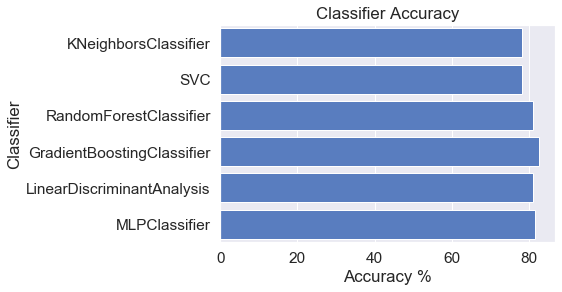

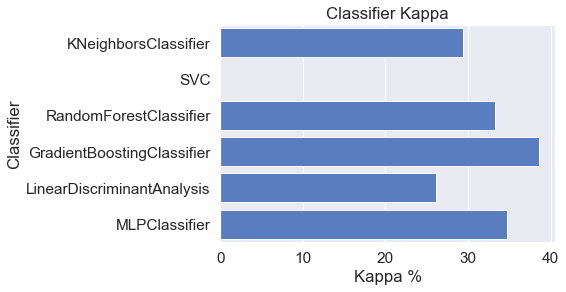

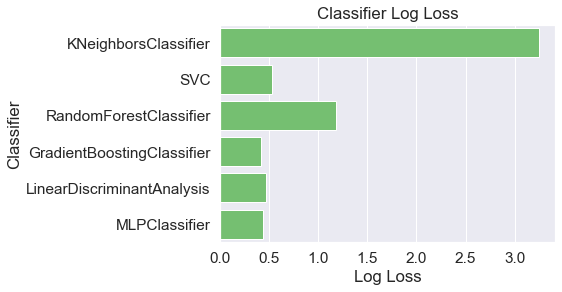

In [184]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Kappa', y='Classifier', data=log, color="b")

plt.xlabel('Kappa %')
plt.title('Classifier Kappa')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

### Matrices de Confusión

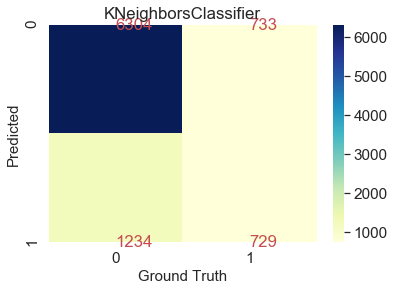

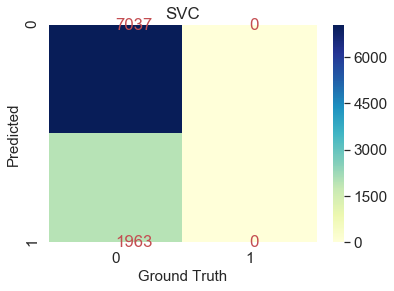

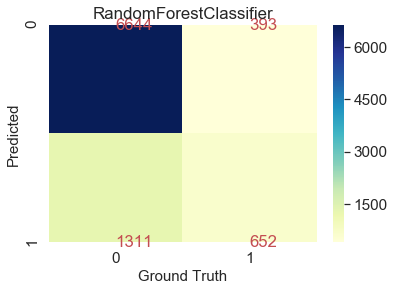

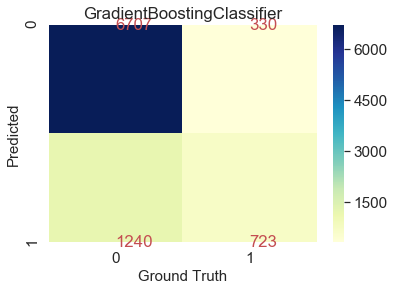

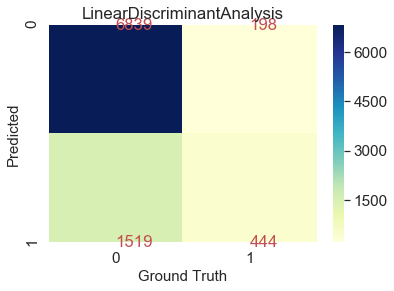

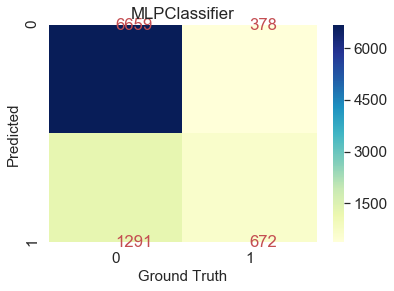

In [185]:
annot_kws = {"ha": 'left',"va": 'center', "color":'r'}
i = 0
for cm in acms:
    sns.set(font_scale=1.4) # for label size
    ax = sns.heatmap(cm, annot=True, annot_kws=annot_kws, fmt="d", cmap="YlGnBu") # font size
    ax.set_title(log.iloc[i]['Classifier'])
    plt.xlabel('Ground Truth', fontsize = 15) # x-axis label with fontsize 15
    plt.ylabel('Predicted', fontsize = 15) # y-axis label with fontsize 15
    plt.show()
    i = i + 1 

### Resultados out of the box
Los resultados de los modelos out of the box nos dan 3 ganadores en los cuáles nos vamos a enfocar
1. GradientBoostingClassifier
2. RandomForestClassifier
3. MLPClassifier (neural network)


In [208]:
## para recopilar resultados
log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

### Gradient Boosting Tunning
Los valores out of the box son los siguientes:

Accuracy: 82.5444%
Kappa: 38.5661%

El tunning debe mejorar los valores obtenidos.

#### Repetir "out of the box"

In [138]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

modelGBT_otb = GradientBoostingClassifier()
modelGBT_otb.fit(X_train,y_train.values.ravel())
predictors=list(X_train)

print('Accuracy of the GBM on test set: {:.3f}'.format(modelGBT_otb.score(X_test, y_test.values.ravel())))

pred=modelGBT_otb.predict(X_test)
acc = accuracy_score(y_test.values.ravel(), pred)
print("Accuracy: {:.4%}".format(acc))
    
kap = cohen_kappa_score(y_test.values.ravel(), pred)
print("Kappa: {:.4%}".format(kap))

print(classification_report(y_test.values.ravel(), pred))

Accuracy of the GBM on test set: 0.825
Accuracy: 82.5444%
Kappa: 38.5661%
              precision    recall  f1-score   support

           0       0.84      0.95      0.90      7037
           1       0.69      0.37      0.48      1963

    accuracy                           0.83      9000
   macro avg       0.76      0.66      0.69      9000
weighted avg       0.81      0.83      0.80      9000



In [209]:
log_entry = pd.DataFrame([['GBM_otb', acc*100]], columns=log_cols)
log = log.append(log_entry)

Text(0, 0.5, 'Feature Importance Score')

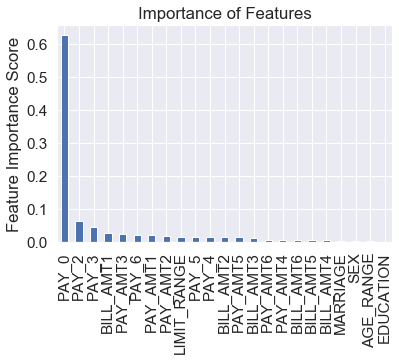

In [139]:
feat_imp = pd.Series(modelGBT_otb.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

#### Tunning
Se intentará mejorar el modelo con los siguientes parámetros: number of trees, tree depth & learning rate 

In [141]:
p_test3 = {'learning_rate':[0.1,0.05,0.01], 'n_estimators':[100,500,1000,1500]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(), param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train.values.ravel())


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [148]:
pd.DataFrame(tuning.cv_results_), tuning.best_params_, tuning.best_score_

(    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 0        2.859046      0.108714         0.029293        0.003062   
 1       16.563211      0.363361         0.058549        0.006054   
 2       31.909226      0.684549         0.107520        0.014140   
 3       44.743842      0.573714         0.137534        0.003966   
 4        3.172996      0.083431         0.027212        0.003558   
 5       15.246310      0.234637         0.064141        0.004642   
 6       29.724836      0.224081         0.090737        0.010640   
 7       44.271110      0.631324         0.131367        0.012414   
 8        3.045206      0.071075         0.030326        0.004494   
 9       15.499455      0.243552         0.066016        0.004468   
 10      30.763506      0.334913         0.111582        0.006018   
 11      42.709484      5.449123         0.137791        0.031411   
 
    param_learning_rate param_n_estimators  \
 0                  0.1                100   
 1       

Paradójicamente, el tunning dio un accuracy peor que el out of the box. Sin embargo, ya tenemos los parámetros de learning_rate en 0.01 y n_estimators en 500. Ahora se tuneará max_depth con estos valores.

#### Tunning Max_depth

In [149]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01,n_estimators=500), param_grid = p_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.01,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=500,
                                                  n_iter_no_change=None,
                                                  presort

In [150]:
pd.DataFrame(tuning.cv_results_), tuning.best_params_, tuning.best_score_

(   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 0       9.480165      0.303354         0.054119        0.004632   
 1      16.652151      0.240881         0.071253        0.004906   
 2      22.741190      1.798132         0.063853        0.005037   
 3      29.414047      0.863491         0.086982        0.010925   
 4      42.913733      2.443499         0.099541        0.006303   
 5      59.729320      8.810248         0.108516        0.018498   
 
   param_max_depth            params  split0_test_score  split1_test_score  \
 0               2  {'max_depth': 2}           0.813378           0.818377   
 1               3  {'max_depth': 3}           0.814092           0.818853   
 2               4  {'max_depth': 4}           0.815282           0.816472   
 3               5  {'max_depth': 5}           0.812188           0.814568   
 4               6  {'max_depth': 6}           0.813854           0.810997   
 5               7  {'max_depth': 7}           0.81361

In [210]:
log_entry = pd.DataFrame([['GBT', tuning.best_score_*100]], columns=log_cols)
log = log.append(log_entry)

Después del tunning el mejor valor para max_depth fue 2. 

El accuracy final fue de 81.9%, el cuál está por debajo del 82.5% obtenido en el out of the box

Por tanto, es necesario entender cuáles fueron los parámetros utilizados por default.

In [151]:
modelGBT_otb

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

##### Conclusión:
Los mejores parámetros para GBT son learning_rate = 0.1, max_depth = 3 y n_estimators = 100, el resto de los parámetros en default y con eso obtenemos un Accuracy = 82.5%

### RandomForestClassifier Tunning
Los valores out of the box son los siguientes:

Accuracy: 80.9556%
Kappa: 32.2422%

El tunning debe mejorar los valores obtenidos.

#### Repetir "out of the box"

In [165]:
modelRFC_otb = RandomForestClassifier()
modelRFC_otb.fit(X_train,y_train.values.ravel())
predictors=list(X_train)

print('Accuracy of the RandomForest on test set: {:.3f}'.format(modelRFC_otb.score(X_test, y_test.values.ravel())))

pred=modelRFC_otb.predict(X_test)
acc = accuracy_score(y_test.values.ravel(), pred)
print("Accuracy: {:.4%}".format(acc))
    
kap = cohen_kappa_score(y_test.values.ravel(), pred)
print("Kappa: {:.4%}".format(kap))

print(classification_report(y_test.values.ravel(), pred))

Accuracy of the RandomForest on test set: 0.808
Accuracy: 80.8222%
Kappa: 31.6154%
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7037
           1       0.62      0.31      0.42      1963

    accuracy                           0.81      9000
   macro avg       0.73      0.63      0.65      9000
weighted avg       0.79      0.81      0.78      9000



In [211]:
log_entry = pd.DataFrame([['RFC_otb', acc*100]], columns=log_cols)
log = log.append(log_entry)

Text(0, 0.5, 'Feature Importance Score')

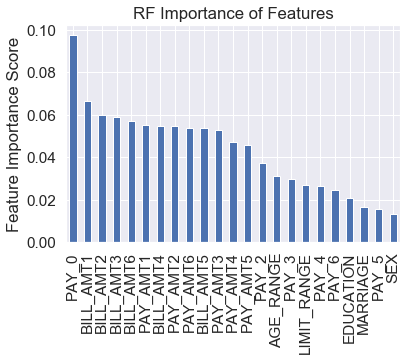

In [168]:
feat_imp = pd.Series(modelRFC_otb.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='RF Importance of Features')
plt.ylabel('Feature Importance Score')

#### Tunning
Se intentará mejorar el modelo con los siguientes parámetros: tree depth & max_features

In [176]:
# son 23 columnas, max_features ideal value debería ser sqrt(columnas). Este valor es 5. Veremos cuál queda mejor
p_test3 = {'max_features':[5,8,11,15,20], 'max_depth':[2,3,4,5,6,7]}
tuning = GridSearchCV(estimator =RandomForestClassifier(), param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [177]:
pd.DataFrame(tuning.cv_results_), tuning.best_params_, tuning.best_score_

(    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 0        0.130345      0.009810         0.018104        0.003041   
 1        0.172020      0.010792         0.016796        0.004034   
 2        0.213135      0.023174         0.015164        0.002051   
 3        0.250183      0.013809         0.018196        0.002015   
 4        0.319625      0.020295         0.018020        0.003774   
 5        0.184161      0.015538         0.018305        0.004030   
 6        0.218081      0.016371         0.015712        0.000544   
 7        0.271392      0.017145         0.020980        0.004205   
 8        0.357409      0.014363         0.019006        0.004143   
 9        0.461404      0.028591         0.022515        0.005029   
 10       0.201357      0.032932         0.017296        0.003785   
 11       0.273345      0.013079         0.016303        0.002433   
 12       0.355224      0.026570         0.015763        0.000675   
 13       0.439882      0.006254  

In [212]:
log_entry = pd.DataFrame([['RFC_tunning', tuning.best_score_*100]], columns=log_cols)
log = log.append(log_entry)

#### Conclusion
El accuracy final fue de 81.9%, el cuál está por encima del 80.8% obtenido en el out of the box. Por tanto, después del tunning el mejor valor para max_depth fue 5 y para max_features = 15. 




#### Ejecución con parámetros tuneados para ver feature importance

In [178]:
modelRFC = RandomForestClassifier(max_depth=5, max_features = 15)
modelRFC.fit(X_train,y_train.values.ravel())
predictors=list(X_train)

print('Accuracy of the RandomForest on test set: {:.3f}'.format(modelRFC.score(X_test, y_test.values.ravel())))

pred=modelRFC.predict(X_test)
acc = accuracy_score(y_test.values.ravel(), pred)
print("Accuracy: {:.4%}".format(acc))
    
kap = cohen_kappa_score(y_test.values.ravel(), pred)
print("Kappa: {:.4%}".format(kap))

print(classification_report(y_test.values.ravel(), pred))

Accuracy of the RandomForest on test set: 0.827
Accuracy: 82.6667%
Kappa: 37.8313%
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7037
           1       0.71      0.35      0.47      1963

    accuracy                           0.83      9000
   macro avg       0.77      0.65      0.68      9000
weighted avg       0.81      0.83      0.80      9000



In [213]:
log_entry = pd.DataFrame([['RFC', acc*100]], columns=log_cols)
log = log.append(log_entry)

Text(0, 0.5, 'Feature Importance Score')

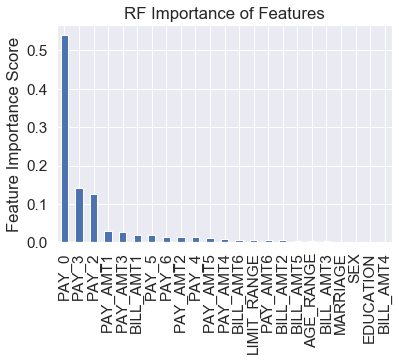

In [179]:
feat_imp = pd.Series(modelRFC.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='RF Importance of Features')
plt.ylabel('Feature Importance Score')

In [246]:
dfRFCfeatures = pd.DataFrame(predictors, columns=['feature'])
dfRFCfeatures['importance'] = modelRFC.feature_importances_.tolist()
dfRFCfeatures['importance'] = round(dfRFCfeatures['importance']*100,2)
dfRFCfeatures.sort_values(by=['importance'], ascending=False)

,feature,importance
3,PAY_0,53.98
5,PAY_3,14.24
4,PAY_2,12.58
17,PAY_AMT1,2.84
19,PAY_AMT3,2.74
11,BILL_AMT1,1.90
7,PAY_5,1.79
8,PAY_6,1.50
18,PAY_AMT2,1.36
6,PAY_4,1.32


### MLPClassifier (Neural Network) Tunning

Los valores obtenidos out of the box fueron 

Accuracy: 81.4556%
Kappa: 34.6763%

El tunning debe mejorar esos valores

#### Repetir Out of the box


In [186]:
modelMLP_otb = MLPClassifier()
modelMLP_otb.fit(X_train,y_train.values.ravel())
predictors=list(X_train)

print('Accuracy of the MLP (Neural Network) on test set: {:.3f}'.format(modelMLP_otb.score(X_test, y_test.values.ravel())))

pred=modelMLP_otb.predict(X_test)
acc = accuracy_score(y_test.values.ravel(), pred)
print("Accuracy: {:.4%}".format(acc))
    
kap = cohen_kappa_score(y_test.values.ravel(), pred)
print("Kappa: {:.4%}".format(kap))

print(classification_report(y_test.values.ravel(), pred))

C:\Users\rramirez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy of the MLP (Neural Network) on test set: 0.818
Accuracy: 81.8111%
Kappa: 35.0400%
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7037
           1       0.66      0.33      0.45      1963

    accuracy                           0.82      9000
   macro avg       0.75      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000



In [214]:
log_entry = pd.DataFrame([['MLP_otb', acc*100]], columns=log_cols)
log = log.append(log_entry)

#### Feature Importance
La forma en que se guardan los coeficientes impide el entendimiento del peso de cada feature. Es algo intrínsico de Neural Networks. 

#### Tunning

In [200]:
p_test3 = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']}

tuning = GridSearchCV(estimator =MLPClassifier(max_iter=1000), param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=1000,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid=False, n_jobs=4,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha'

In [201]:
pd.DataFrame(tuning.cv_results_), tuning.best_params_, tuning.best_score_

(    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 0       32.850251      6.981350         0.027900        0.003014   
 1       56.451051     31.449225         0.028493        0.006775   
 2       35.036036      3.936226         0.032079        0.008875   
 3       85.135168      9.515119         0.031089        0.004660   
 4       35.695933      6.642710         0.031282        0.004740   
 5       77.706792     23.209925         0.031089        0.005131   
 6       55.272273     19.539735         0.033665        0.006030   
 7       71.368563     31.497425         0.032287        0.007326   
 8       16.041899      1.745102         0.019528        0.000490   
 9       31.668513     12.589395         0.031089        0.008988   
 10      16.747585      1.882808         0.020330        0.001364   
 11      23.771464      4.798829         0.020118        0.001164   
 12      31.667576      3.921819         0.028299        0.006519   
 13      40.539008     27.132990  

In [215]:
log_entry = pd.DataFrame([['MLP_tunning', tuning.best_score_*100]], columns=log_cols)
log = log.append(log_entry)

##### Conclusion
Al final, la mejor combinación de parámetros fue: 

activation = 'tanh',
alpha = 0.0001,
hidden_layer_sizes = (100,),
learning_rate = 'adaptive',
solver = 'sgd'

Sin embargo, esto dio un accuracy de 81.76%, los cuál está por debajo del 81.8% obtenido sin tunear. 

#### Ejecución con parámetros tuneados

In [202]:
modelMLP = MLPClassifier(max_iter=1000, activation = 'tanh', alpha = 0.0001, hidden_layer_sizes = (100,), learning_rate = 'adaptive', solver = 'sgd')
modelMLP.fit(X_train,y_train.values.ravel())
predictors=list(X_train)

print('Accuracy of the MLP (Neural Network) on test set: {:.3f}'.format(modelMLP.score(X_test, y_test.values.ravel())))

pred=modelMLP.predict(X_test)
acc = accuracy_score(y_test.values.ravel(), pred)
print("Accuracy: {:.4%}".format(acc))
    
kap = cohen_kappa_score(y_test.values.ravel(), pred)
print("Kappa: {:.4%}".format(kap))

print(classification_report(y_test.values.ravel(), pred))

Accuracy of the MLP (Neural Network) on test set: 0.824
Accuracy: 82.4111%
Kappa: 36.9289%
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7037
           1       0.70      0.34      0.46      1963

    accuracy                           0.82      9000
   macro avg       0.77      0.65      0.68      9000
weighted avg       0.81      0.82      0.80      9000



In [216]:
log_entry = pd.DataFrame([['MLP', acc*100]], columns=log_cols)
log = log.append(log_entry)

### Conclusión Final
Al ejecutar nuevamente el modelo MLP con los parámetros tuneados se obtiene un Acuracy de 82.4%, el más alto. Sin embargo, éste algoritmo tiene dificultad para generar la importancia de cada feature. Para un posible deployment, sin duda este modelo es el recomendado. Pero para efectos de explicación de la labor realizada se utilizará RandomForest tuneado, el cual obtuvo un accuracy de hasta 82.67%. 

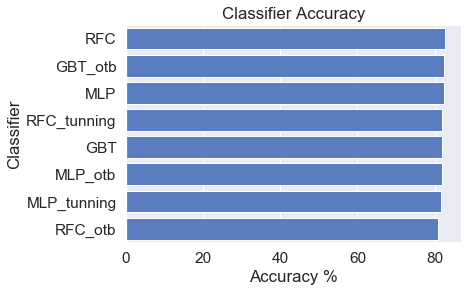

,Classifier,Accuracy
0,RFC,82.67
0,GBT_otb,82.54
0,MLP,82.41
0,RFC_tunning,81.90
0,GBT,81.89
0,MLP_otb,81.81
0,MLP_tunning,81.77
0,RFC_otb,80.82


In [223]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by=['Accuracy'], ascending=False), color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

log.sort_values(by=['Accuracy'], ascending=False)

### Guardar los modelos obtenidos
A continuación se procederá a serializar los modelos obtenidos.

In [227]:
import pickle
pickle.dump(modelGBT_otb, open('modelGBT_otb.model', 'wb'))
pickle.dump(modelRFC_otb, open('modelRFC_otb.model', 'wb'))
pickle.dump(modelRFC, open('modelRFC.model', 'wb'))
pickle.dump(modelMLP_otb, open('modelMLP_otb.model', 'wb'))
pickle.dump(modelMLP, open('modelMLP.model', 'wb'))


## Construcción de un modelo solo con variables conocidas antes de otorgar el crédito

In [249]:
dsReady2 = dsReady.copy()
dsReady2 = dsReady2[['SEX','EDUCATION','MARRIAGE','AGE_RANGE','LIMIT_RANGE']]
dsReady2.head()
dsReady2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 5 columns):
SEX            30000 non-null category
EDUCATION      30000 non-null category
MARRIAGE       30000 non-null category
AGE_RANGE      30000 non-null category
LIMIT_RANGE    30000 non-null category
dtypes: category(5)
memory usage: 147.7 KB


In [279]:
# tomo una muestra del dataset ready 
X_train, X_test, y_train, y_test = train_test_split(dsReady2, dsCredit01[["DEFAULT_PAYMENT"]], test_size=0.30, random_state=35)
# revisar datos
print("Filas dataset entrenamiento (X_train): ", len(X_train.index))
print("Filas dataset test: (X_test)", len(X_test.index))
print("Filas y_train: ", len(y_train.index))
print("Filas y_test: ", len(y_test.index))

Filas dataset entrenamiento (X_train):  21000
Filas dataset test: (X_test) 9000
Filas y_train:  21000
Filas y_test:  9000


In [280]:
X_train.head()

,SEX,EDUCATION,MARRIAGE,AGE_RANGE,LIMIT_RANGE
26265,0,3,1,2,0
23989,1,1,3,0,4
3531,0,1,3,2,1
27683,0,3,3,0,0
21834,0,3,1,0,1


In [281]:
y_train.head()

,DEFAULT_PAYMENT
26265,0
23989,0
3531,0
27683,1
21834,0


In [285]:
y_train['DEFAULT_PAYMENT'].value_counts()

0    16379
1     4621
Name: DEFAULT_PAYMENT, dtype: int64

In [286]:
y_test['DEFAULT_PAYMENT'].value_counts()

0    6985
1    2015
Name: DEFAULT_PAYMENT, dtype: int64

In [282]:
clasificadores2 = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability=True),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    LinearDiscriminantAnalysis(),
    MLPClassifier()]

log_cols=["Classifier", "Accuracy", "Log Loss", "Kappa"]
log2 = pd.DataFrame(columns=log_cols)
acms2 = []

In [283]:
for model in clasificadores2:
    model.fit(X_train, y_train.values.ravel())
    name = model.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Resultados 2****')
    train_predictions = model.predict(X_test)
    
    cm = confusion_matrix(y_test.values.ravel(),train_predictions)
    acms2.append(cm)
    
    acc = accuracy_score(y_test.values.ravel(), train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    kap = cohen_kappa_score(y_test.values.ravel(), train_predictions)
    print("Kappa: {:.4%}".format(kap))
    
    train_predictions = model.predict_proba(X_test)
    ll = log_loss(y_test.values.ravel(), train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll, kap*100]], columns=log_cols)
    log2 = log2.append(log_entry)
    
    print(cm)
    
print("="*30)

KNeighborsClassifier
****Resultados 2****
Accuracy: 68.9000%
Kappa: -0.5898%
Log Loss: 3.778934747543895
[[5898 1087]
 [1712  303]]
SVC
****Resultados 2****
Accuracy: 77.6111%
Kappa: 0.0000%
Log Loss: 0.5318289200948926
[[6985    0]
 [2015    0]]
RandomForestClassifier
****Resultados 2****
Accuracy: 77.3111%
Kappa: 0.3263%
Log Loss: 0.5906433011424491
[[6941   44]
 [1998   17]]
GradientBoostingClassifier
****Resultados 2****
Accuracy: 77.5556%
Kappa: -0.0562%
Log Loss: 0.5193221626743194
[[6979    6]
 [2014    1]]
LinearDiscriminantAnalysis
****Resultados 2****
Accuracy: 77.6111%
Kappa: 0.0000%
Log Loss: 0.5198222302312634
[[6985    0]
 [2015    0]]
MLPClassifier
****Resultados 2****
Accuracy: 77.6111%
Kappa: 0.0000%
Log Loss: 0.5192367316394726
[[6985    0]
 [2015    0]]


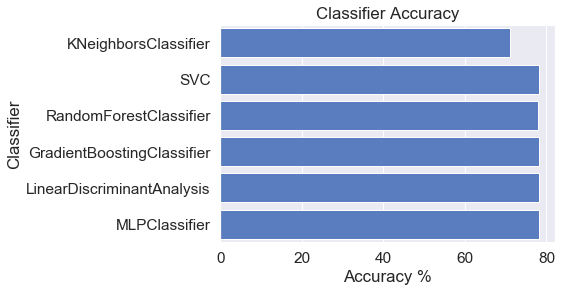

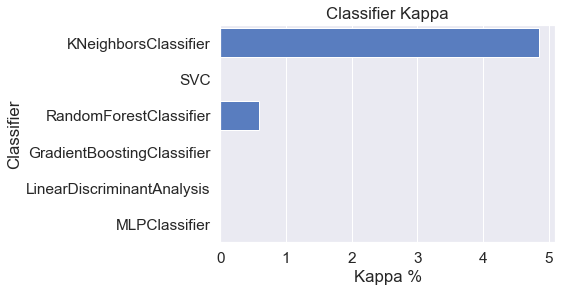

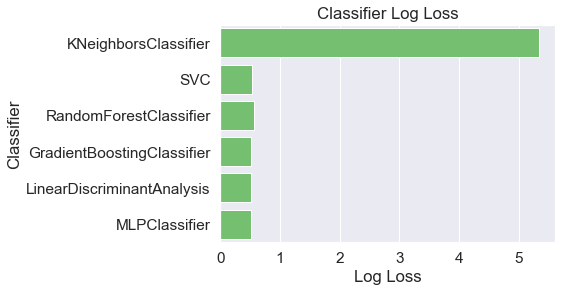

In [272]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log2, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Kappa', y='Classifier', data=log2, color="b")

plt.xlabel('Kappa %')
plt.title('Classifier Kappa')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log2, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [273]:
log2

,Classifier,Accuracy,Log Loss,Kappa
0,KNeighborsClassifier,70.955556,5.338746,4.849089
0,SVC,78.188889,0.524563,0.000000
0,RandomForestClassifier,78.000000,0.570306,0.590067
0,GradientBoostingClassifier,78.188889,0.508097,0.000000
0,LinearDiscriminantAnalysis,78.188889,0.509928,0.000000
0,MLPClassifier,78.188889,0.509936,0.000000


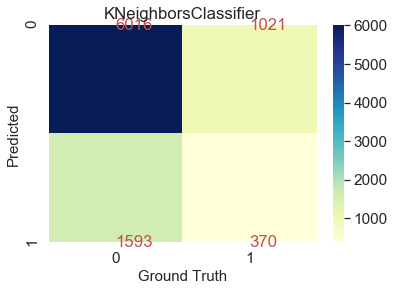

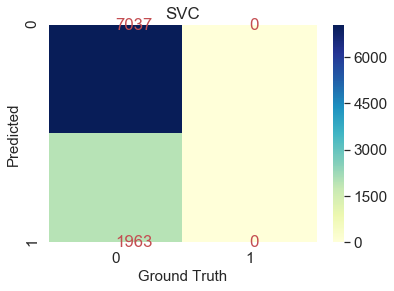

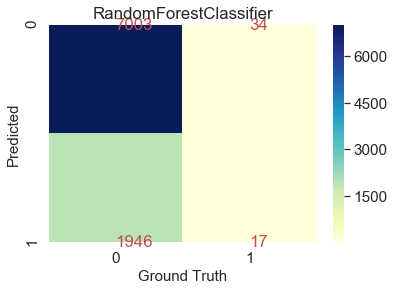

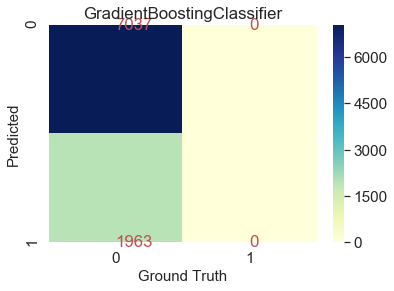

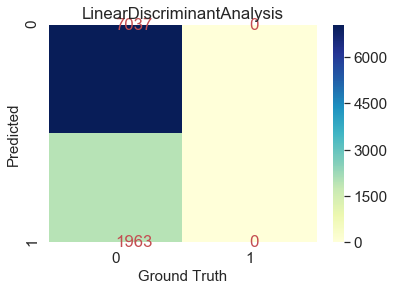

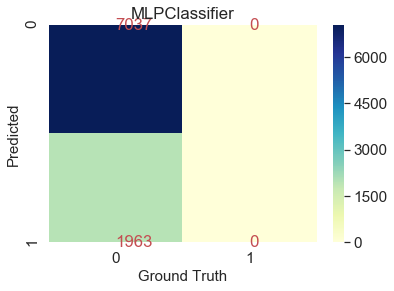

In [274]:
annot_kws = {"ha": 'left',"va": 'center', "color":'r'}
i = 0
for cm in acms2:
    sns.set(font_scale=1.4) # for label size
    ax = sns.heatmap(cm, annot=True, annot_kws=annot_kws, fmt="d", cmap="YlGnBu") # font size
    ax.set_title(log2.iloc[i]['Classifier'])
    plt.xlabel('Ground Truth', fontsize = 15) # x-axis label with fontsize 15
    plt.ylabel('Predicted', fontsize = 15) # y-axis label with fontsize 15
    plt.show()
    i = i + 1 

In [276]:
modelRFC2_otb = RandomForestClassifier()
modelRFC2_otb.fit(X_train,y_train.values.ravel())
predictors=list(X_train)

print('Accuracy of the RandomForest (2) on test set: {:.3f}'.format(modelRFC2_otb.score(X_test, y_test.values.ravel())))

pred=modelRFC2_otb.predict(X_test)
acc = accuracy_score(y_test.values.ravel(), pred)
print("Accuracy: {:.4%}".format(acc))
    
kap = cohen_kappa_score(y_test.values.ravel(), pred)
print("Kappa: {:.4%}".format(kap))

print(classification_report(y_test.values.ravel(), pred))

Accuracy of the RandomForest (2) on test set: 0.780
Accuracy: 77.9889%
Kappa: 0.1725%
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7037
           1       0.26      0.01      0.01      1963

    accuracy                           0.78      9000
   macro avg       0.52      0.50      0.44      9000
weighted avg       0.67      0.78      0.69      9000



Text(0, 0.5, 'Feature Importance Score')

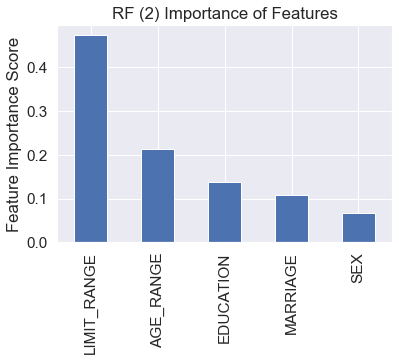

In [277]:
feat_imp = pd.Series(modelRFC2_otb.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='RF (2) Importance of Features')
plt.ylabel('Feature Importance Score')

In [278]:
dfRFCfeatures2 = pd.DataFrame(predictors, columns=['feature'])
dfRFCfeatures2['importance'] = modelRFC2_otb.feature_importances_.tolist()
dfRFCfeatures2['importance'] = round(dfRFCfeatures2['importance']*100,2)
dfRFCfeatures2.sort_values(by=['importance'], ascending=False)

,feature,importance
4,LIMIT_RANGE,47.29
3,AGE_RANGE,21.27
1,EDUCATION,13.87
2,MARRIAGE,10.78
0,SEX,6.80
